In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
image = Image.open('images/cat_2.jpg').convert('L')
print("Input image size:", image.size)
print("Input image mode:", image.mode)

Input image size: (1280, 853)
Input image mode: L


In [3]:
def calc_histogram(image, label):
    histogram = np.zeros(256)
    for pixel in image.getdata():
        histogram[pixel] += 1

    fig, ax = plt.subplots()
    fig.set_size_inches(12, 6)
    ax.bar(range(256), histogram, color='skyblue', edgecolor='gray', width=1.0)

    ax.set_xlabel('Pixel Value', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.set_title(label, fontsize=16, fontweight='bold')
    ax.set_xlim(0, 255)
    ax.set_ylim(0, max(histogram) * 1.1)  # Biraz boşluk bırakmak için max değeri %10 artır
    ax.grid(True, linestyle='--', alpha=0.6)

    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.tight_layout()
    plt.show()

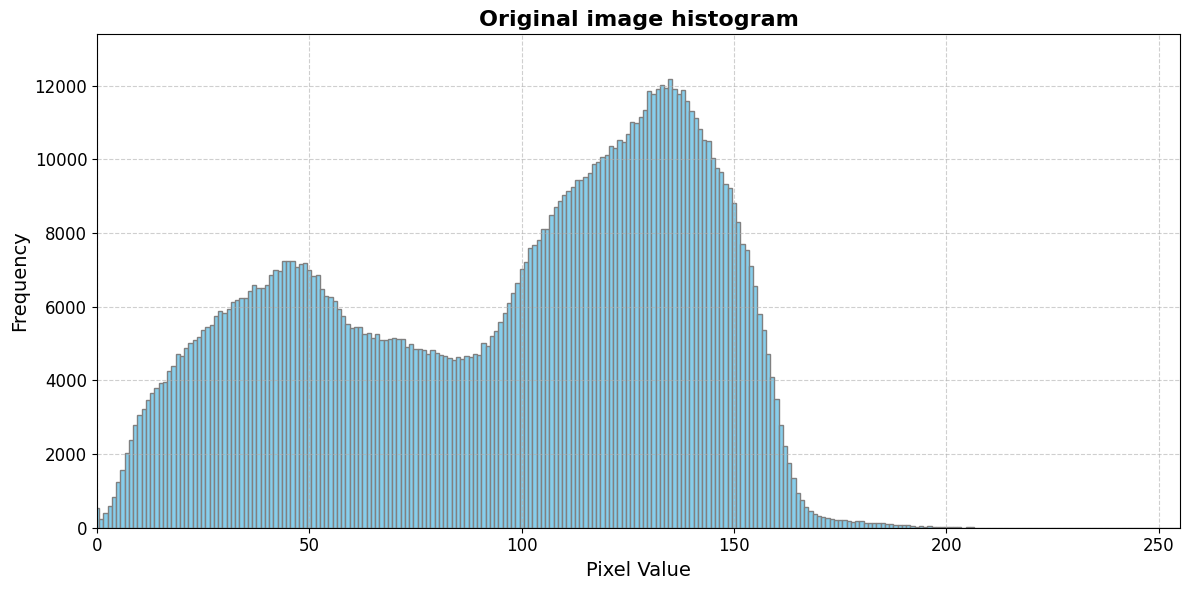

In [4]:
calc_histogram(image, 'Original image histogram')

In [5]:
def create_dark_image(image):
    dark_image = image.copy()
    np_dark_image = np.array(dark_image)
    np_dark_image = np_dark_image / 2.0
    np_dark_image = np_dark_image.astype(np.uint8)
    dark_image = Image.fromarray(np_dark_image)
    return dark_image

def create_bright_image(image):
    bright_image = image.copy()
    np_bright_image = np.array(bright_image)
    np_bright_image = np_bright_image / 2.0 + 127
    np_bright_image = np_bright_image.astype(np.uint8)
    bright_image = Image.fromarray(np_bright_image)
    return bright_image

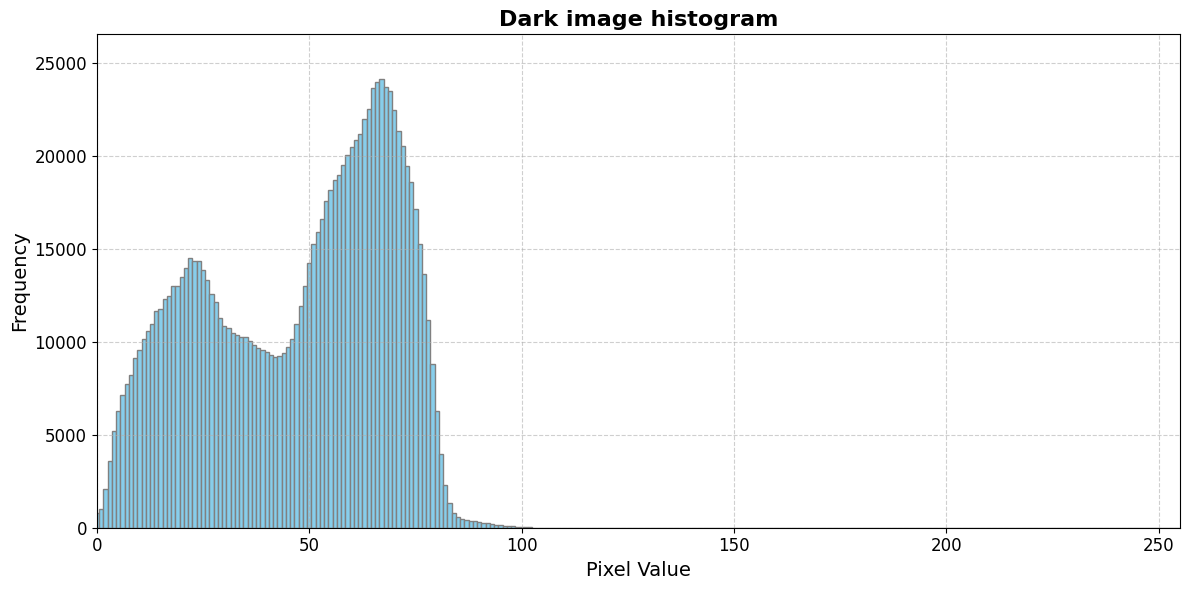

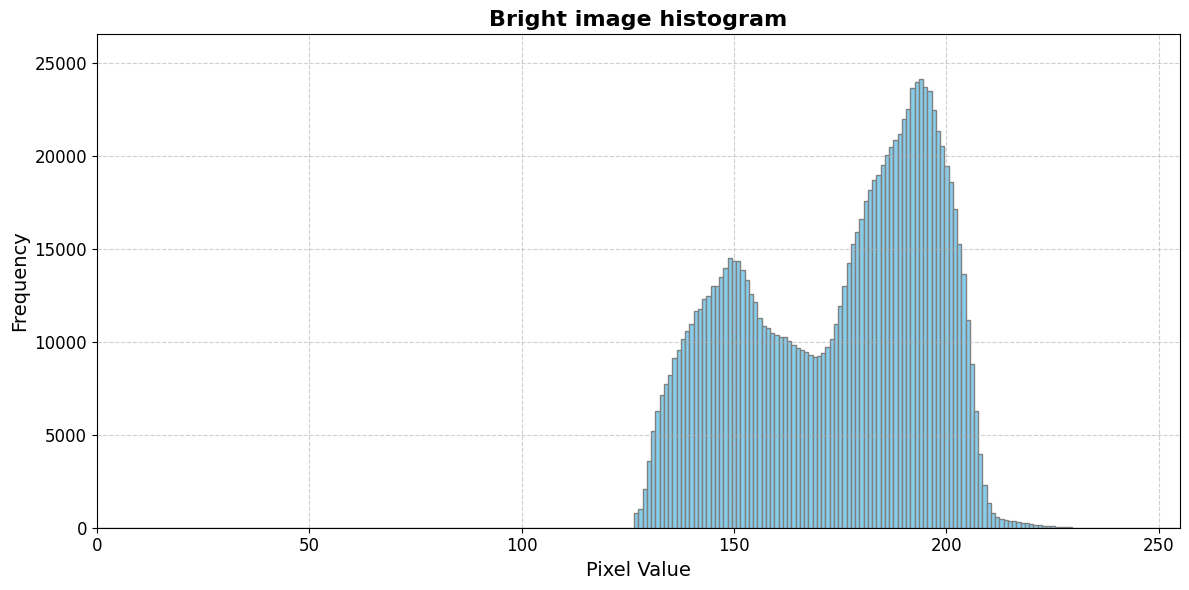

In [6]:
dark_image = create_dark_image(image)
dark_image.save('images/dark_image.png')

bright_image = create_bright_image(image)
bright_image.save('images/bright_image.png')

calc_histogram(dark_image, 'Dark image histogram')
calc_histogram(bright_image, 'Bright image histogram')

In [7]:
def gamma_correction(image, gamma):
    image = np.array(image, dtype=np.uint8)
    np_image = image / 255.0
    np_gamma_image = np.power(np_image, gamma)
    np_gamma_image = np_gamma_image * 255.0
    np_gamma_image = np_gamma_image.astype(np.uint8)
    np_gamma_image = Image.fromarray(np_gamma_image)
    return np_gamma_image

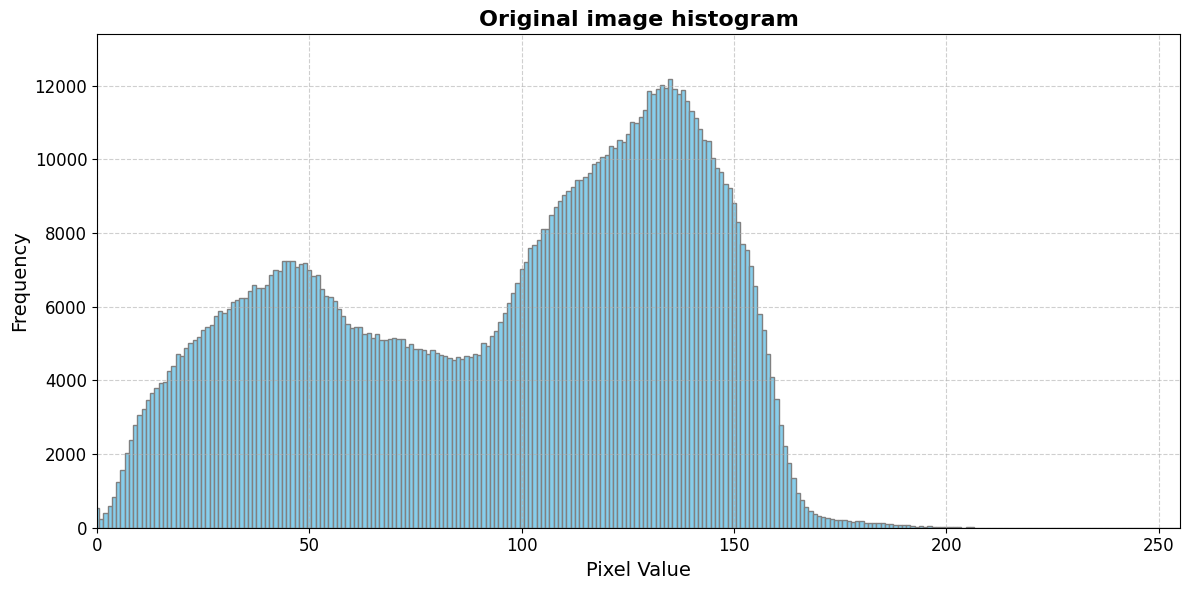

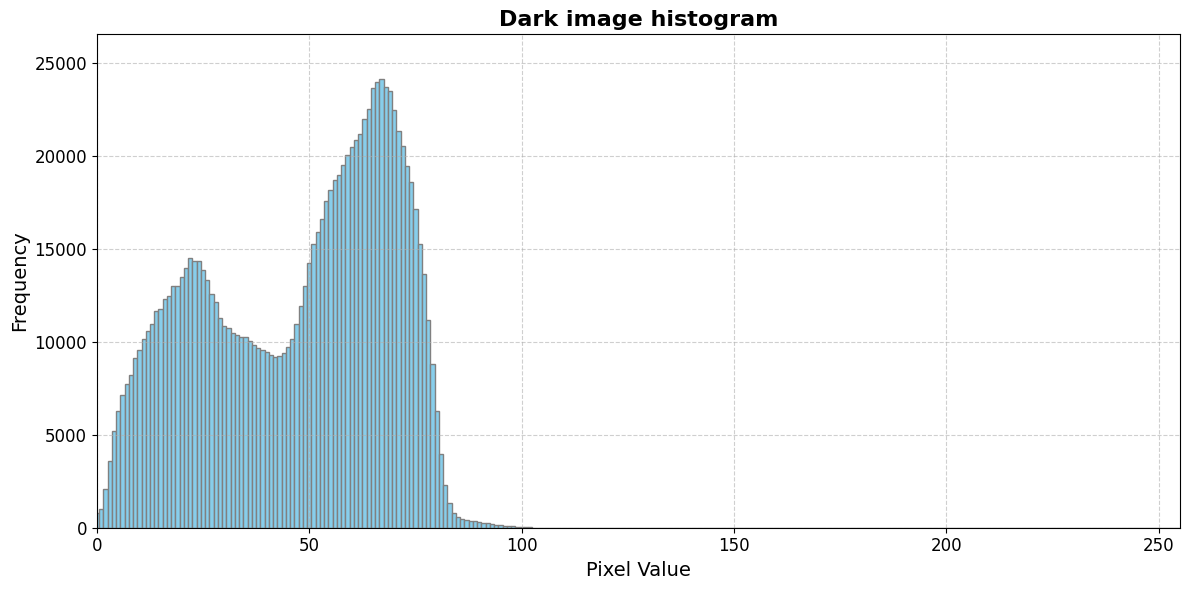

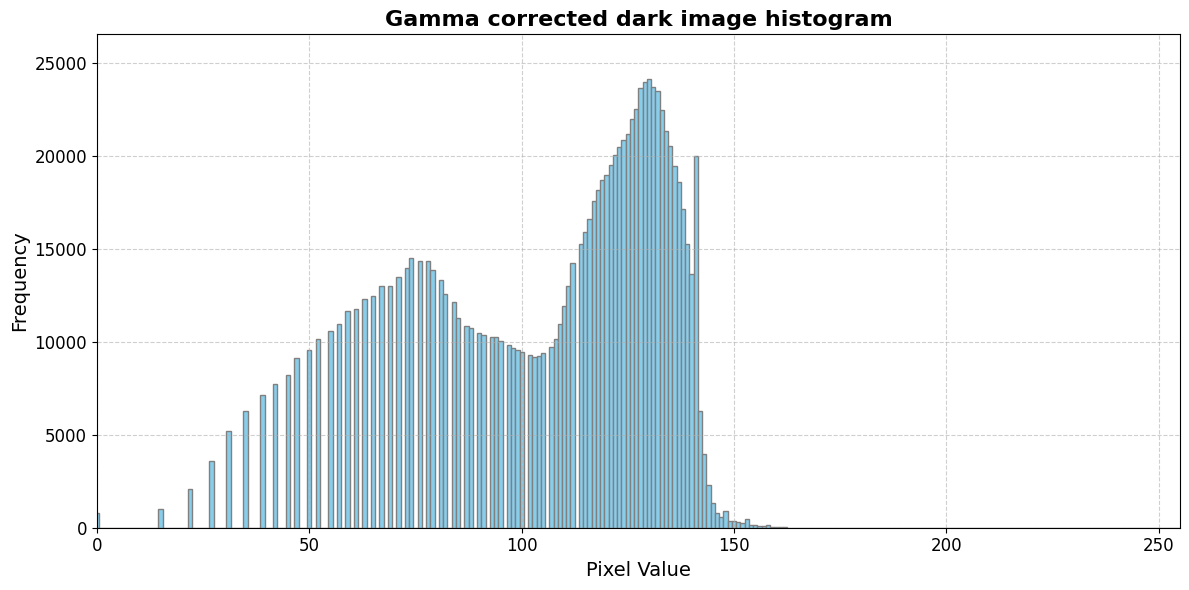

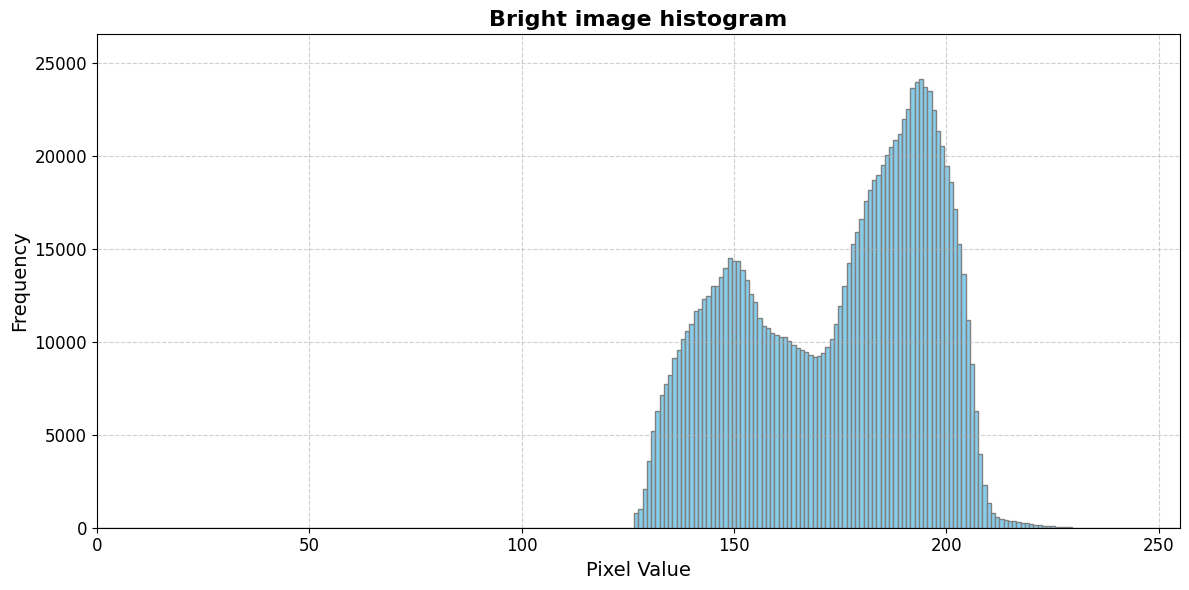

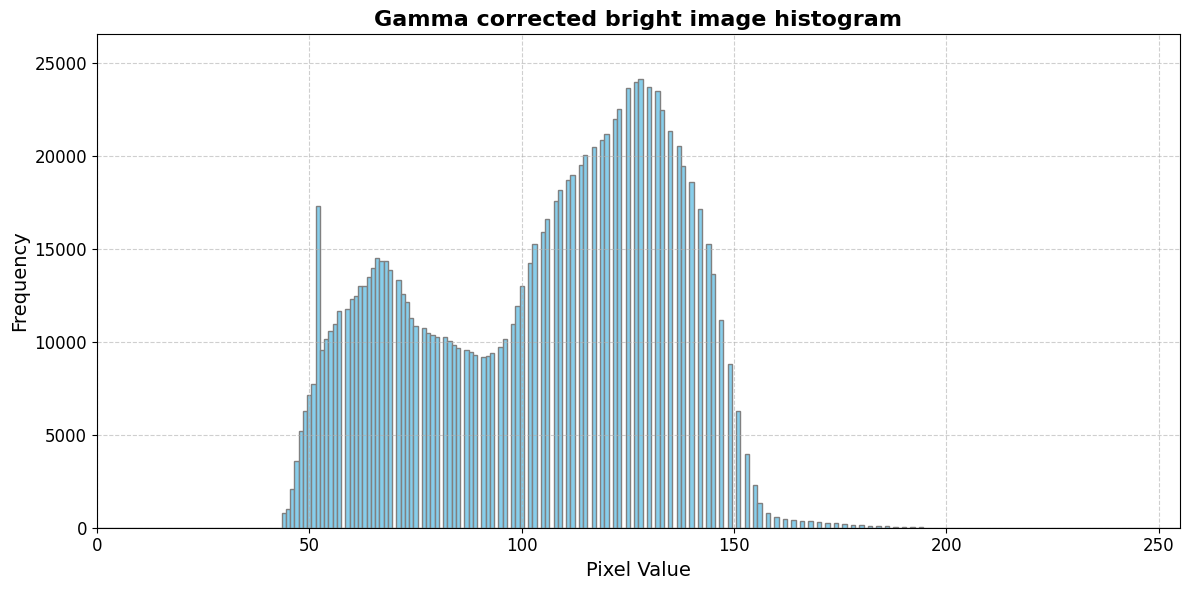

In [8]:
gamma_dark_image = gamma_correction(dark_image, 0.5)
gamma_dark_image.save('images/gamma_dark_image.png')

gamma_bright_image = gamma_correction(bright_image, 2.5)
gamma_bright_image.save('images/gamma_bright_image.png')

calc_histogram(image, 'Original image histogram')
calc_histogram(dark_image, 'Dark image histogram')
calc_histogram(gamma_dark_image, 'Gamma corrected dark image histogram')
calc_histogram(bright_image, 'Bright image histogram')
calc_histogram(gamma_bright_image, 'Gamma corrected bright image histogram')

In [9]:
def psnr(image1, image2):
    mse = np.mean((np.array(image1, dtype=np.float32) - np.array(image2, dtype=np.float32)) ** 2)
    if mse == 0:
        return 100
    return 20 * np.log10(255.0 / np.sqrt(mse))

In [10]:
psnr_dark_image = psnr(image, dark_image)
psnr_brightness_image = psnr(image, bright_image)
psnr_gamma_dark_image = psnr(image, gamma_dark_image)
psnr_gamma_bright_image = psnr(image, gamma_bright_image)

print("PSNR between original and dark image:", psnr_dark_image)
print("PSNR between original and bright image:", psnr_brightness_image)
print("PSNR between original and gamma corrected dark image:", psnr_gamma_dark_image)
print("PSNR between original and gamma corrected bright image:", psnr_gamma_bright_image)


PSNR between original and dark image: 13.733494
PSNR between original and bright image: 9.821864
PSNR between original and gamma corrected dark image: 22.681019
PSNR between original and gamma corrected bright image: 24.483492
